#### **Ads Click Through Rate**




Anúncio #1 tem 1000 impressões e 20 cliques. 

Anúncio #2 tem 900 impressões e 30 cliques.

Teste se há diferença entre o CTR do Anúncio #01 e #02

In [3]:
# H0: Não há diferença de CTR nos 2 anúncios
# H1: Há diferença de CTR nos 2 anúncios

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

success = np.array([20, 30])
observations = np.array([1000, 900])

zstat, pvalue = proportions_ztest(success, observations)
print(f'z-stat: {zstat}\np-value: {pvalue}')

z-stat: -1.812866924649045
p-value: 0.06985234871449321


Considerando alpha = 0.05, não existe diferença entre a taxa de cliques dos 2 anúncios.

#### **Acme Toy Company** *



A empresa Acme Toy imprime cartas de baseball. A empresa afirma que 30% das cartas são de novatos, 60% são de veteranos e 10% são All-Stars.

Uma amostra aleatória de 100 cartas tem 50 cartas de novatos, 45 de veteranos e 5 All-Starts.

A distribuição das cartas é consistente com a afirmação da empresa? 

Use um nível de significância de 0.05;

In [10]:
# H0: A proporção de tipo de cartas é igual
# H1: A proporção de tipo de cartas é diferente

prop_pop = [30, 60, 10]
prop_sample = [50, 45, 5]

from  scipy.stats import chisquare

tstatistic, pvalue = chisquare(prop_sample, prop_pop)
print(f't-statistic: {tstatistic}\np-value: {pvalue}')

t-statistic: 19.583333333333336
p-value: 5.5915626856371765e-05


Considerando alpha = 0.05 pode-se concluir que a proporção de cartas são diferentes.

#### **Pesquisa Eleitoral**

Uma empresa de pesquisa perguntou a preferência de votos entre 1000 eleitores aleatórios, dividido entre homens e mulheres.

O resultado é mostrado na tabela de contingência abaixo.

|          | Republicano | Democrata | Independente | Total |
|----------|-------------|-----------|--------------|----------------|
| Homens   | 200         | 150       | 50           | 400            |
| Mulheres | 250         | 300       | 50           | 600            |
| Total    | 450         | 450       | 100          | 1000           |

Existe uma diferença entre o eleitores de diferente gênero? 

As preferências dos homens se diferem significativamente das preferências das mulheres? 

Use um nível de significância de 0.05;

In [4]:
# H0: Não existe diferença na preferência por conta do gênero
# H1: Existe diferença na preferência por conta do gênero

from scipy.stats import chi2_contingency

h = [200, 150, 50]
m = [250, 300, 50]
obs = [h, m]

tstatistic, pvalue, dof, _ = chi2_contingency(obs)
print(f't-statistic: {tstatistic}\np-value:{pvalue}\ndegress_of_freedom: {dof}\n')

t-statistic: 16.203703703703702
p-value:0.0003029775487145488
degress_of_freedom: 2



Considerando alpha = 0.05 podemos concluir que existe uma diferença da preferência observando o gênero.

#### **Altura das Meninas**

Precisamos determinar se as meninas, na média, tiram uma nota maior do que 600 na prova. Nós temos a informação de que as meninas tem um desvio padrão de nota igual a 100.

Então, nós coletamos dados de 20 meninas usando uma amostragem aleatória e
armazenamos na lista abaixo.

Podemos dizer que as meninas, em média, tiram notas maiores que 600?

Assumindo um nível de significância de 0.05;

In [15]:
# H0: A média de notas é igual a 600
# H1: A média de notas é maior que 600

import numpy as np
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest

data = [650, 730, 510, 670, 480, 800, 690, 530, 590, 620, 710, 670, 640, 780, 650, 490, 800, 600, 510, 700]

print('Usando scipy ttest_1samp')
tstatistic, pvalue = ttest_1samp(a=data, popmean=600, alternative='greater')
print(f't-statistic: {tstatistic}\np-value:{pvalue}\n')

# Preferível usar ztest por serem valores inteiros
print('Usando statsmodels ztest')
tstatistic, pvalue = ztest(data, value=600, alternative='larger')
print(f't-statistic: {tstatistic}\np-value:{pvalue}\n')

Usando scipy ttest_1samp
t-statistic: 1.831744911595958
p-value:0.041357252472702624

Usando statsmodels ztest
t-statistic: 1.831744911595958
p-value:0.03349471703839336



Considerando o alpha = 0.05 podemos dizer que a média de notas é maior que 600.

#### **Entrega da farmácia**

Um farmácia afirma que a média do tempo de entrega dos medicamentos é menor do que 120 minutos com desvio padrão de 30 minutos.

Foram selecionadas 49 entregas aleatórias e o tempo médio essas entregas foi de 100 minutos.

Há evidências suficientes para confirmar a afirmação da farmácia com 0.05 de nível de significância?

In [20]:
# H0: A média de tempo de entrega é igual a 120 minutos
# H1: A média de tempo de entrega é menor que 120 minutos

import numpy as np
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest

mean = 100
std = 30
size = 49

np.random.seed(13)
data = np.random.normal(loc=mean, scale=std, size=size).astype(int)

print('Usando scipy ttest_1samp')
tstatistic, pvalue = ttest_1samp(a=data, popmean=120, alternative='less')
print(f't-statistic: {tstatistic}\np-value: {pvalue}\n')

# Preferível usar ztest por serem valores inteiros
print('Usando statsmodels ztest')
tstatistic, pvalue = ztest(data, value=120, alternative='smaller')
print(f't-statistic: {tstatistic}\np-value: {pvalue}\n')

Usando scipy ttest_1samp
t-statistic: -4.130089873717287
p-value: 7.20375909677432e-05

Usando statsmodels ztest
t-statistic: -4.130089873717286
p-value: 1.8131072417424613e-05



Considerando alpha = 0.05 podemos concluir que o tempo de entrega é menor que 120 minutos.

#### **Defeitos na empresa**

Uma empresa quer melhorar a qualidade dos produtos reduzindo os defeitos e
monitorando a eficiência das linhas de montagem. 

A linha de montagem A, havia 18 defeitos relatados de 200 amostras selecionadas aleatoriamente, enquanto 25 defeitos de 600 amostras foram relatadas na linha de montagem B.

Há uma diferença entre as linhas de produção em um nível de significância de 0.05?

In [10]:
# H0: Não existe diferença entre as linhas de produção
# H1: Existe diferença entre as linhas de produção

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

success = [18, 25]
pop = [200, 600]

tstatistic, pvalue = proportions_ztest(success, pop)

print(f't-statistic: {tstatistic}\np-value: {pvalue}\n')

t-statistic: 2.624824049200042
p-value: 0.008669375420073044



Considerando alpha = 0.05 podemos concluir que há diferença entre as linhas de produção.

#### **Nível de Educação**

Pesquisadores gostariam de saber se o estado civil está associado com o nível de educação. Para isso, eles entrevistaram 300 pessoas leatoriamente e obtiveram os seguintes resultados:

|         | High School | Bachelor’s | Master’s or Higher | Total |
|---------|-------------|------------|--------------------|-------|
| Married | 20          | 100        | 35                 | 155   |
| Single  | 50          | 80         | 15                 | 145   |
| Total   | 70          | 180        | 50                 | 300   |

In [11]:
# H0: O estado civil não está associado ao nível educação
# H1: O estado civil está associado ao nível de educação

import numpy as np
from scipy.stats import chi2_contingency

m = [20, 100, 35]
s = [50, 80, 15]
obs = [m, s]

tstatistic, pvalue, dof, _ = chi2_contingency(obs)

print(f't-statistic: {tstatistic}\np-value: {pvalue}\ndegrees_of_freedom: {dof}')

t-statistic: 22.771333227395516
p-value: 1.1357109599633353e-05
degrees_of_freedom: 2


Considerando alpha = 0.05 pode-se concluir que eo estado civil está associado ao nível de educação.

#### **Dono da Loja**

O dono da loja afirma que um número igual de clientes visitam a sua loja cada dia da semana.

Para testar essa hipótese, um Cientista de Dados registrou um número de clientes que visitaram a loja em uma determina semana e encontrou os  seguintes resultados:

|         | Visitantes |
|---------|-------------|
| Segunda | 50          |
| Terça   | 60          |
| Quarta  | 40          |
| Quinta  | 47          |
| Sexta   | 53          |

Os dados são consistentes com a afirmação do dono da loja?

In [13]:
# H0: Quantidade de clientes é a mesma todos os dias da semana
# H1: Quantidade de clientes é diferente em todos os dias da semana

import numpy as np
from scipy.stats import chisquare

obs = [50, 60, 40, 47, 53]
exp = [np.mean(obs) for i in range(len(obs))]

tstatistic, pvalue = chisquare(obs, exp)

print(f't-statistic: {tstatistic}\np-value: {pvalue}')

t-statistic: 4.359999999999999
p-value: 0.3594720674366307


Considerando aplha = 0.05 pode-se concluir que a quantidade de clientes é a mesma em todos os dias da semana.

#### **Método de estudo** *

Professores de uma universidade desenvolveram 3 tipos de métodos de aprendizagem: Métodos Cíclico, Linear e Pirâmide para ajudar a performance dos alunos em um importante exame.

Para testar se os 3 diferentes tipos de aprendizagem impactam na performance dos estudantes, os professores atribuíram aleatoriamente 30 estudantes para aprender um dos métodos de aprendizagem durante 3 semanas de preparação.

Todos os estudantes realizaram o mesmo teste e os resultados das suas pontuações são mostrados abaixo:

Verificar se a pontuação média é a mesma para os 3 grupos.

In [2]:
# H0: A pontuação média é a mesma para os grupos
# H1: A pontuação média é diferente para os grupos

grupo_ciclico = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
grupo_linear = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
grupo_piramide = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
metodos = [grupo_ciclico, grupo_linear, grupo_piramide]

import numpy as np
from scipy.stats import f_oneway

tstatistic, pvalue = f_oneway(*metodos)
print(f't-statistic: {tstatistic}\np-value: {pvalue}')

t-statistic: 2.3575322551335636
p-value: 0.11384795345837218


Considerando alpha = 0.05 pode-se concluir que a pontuação média dos métodos é a mesma.

**Verificação das premissas paramétricas para o teste de ANOVA:**

1. Igualdade de variâncias -> boxplot e Bartllet's test;
2. Dados distribuídos normalmente -> Shapiro e Q-Q plot;
3. Independência das variáveis;

In [3]:
# Ajuste do dataframe

import pandas as pd

def insert_method(name, size):
    return [name for i in range(size)]

df = pd.DataFrame({'metodo': insert_method('ciclico', 10) + \
                             insert_method('linear', 10) + \
                             insert_method('piramide', 10),
                   'value': grupo_ciclico + grupo_linear + grupo_piramide})

df.head(1)

,metodo,value
0,ciclico,85


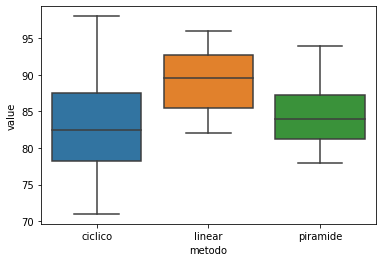

In [9]:
# Variâncias iguais
import seaborn as sns
sns.boxplot(data=df, x='metodo', y='value');

Uma possibilidade é verificar via boxplot, mas é mais suscetível a erro de interpretação.

In [8]:
from scipy.stats import bartlett
tstatistic, pvalue = bartlett(*metodos)
print(f't-statistic: {tstatistic}\np-value: {pvalue}')

t-statistic: 3.3024375753550594
p-value: 0.19181598314035977


O uso do teste de Bartlett é mais recomendável. 

Nesse caso, observando o p-value, ocorreu falha em rejeitar a hipótese nula, portanto as variâncias são iguais.

In [12]:
# Normalidade dos dados
from scipy.stats import shapiro
tstatistic, pvalue = shapiro(df.value)
print(f't-statistic: {tstatistic}\np-value: {pvalue}')

t-statistic: 0.980752170085907
p-value: 0.8451867699623108


O teste de Shapiro confirma a normalidade dos dados, pois o p-value > 0.05, portanto ocorre falha em rejeitar a hipótese nula.

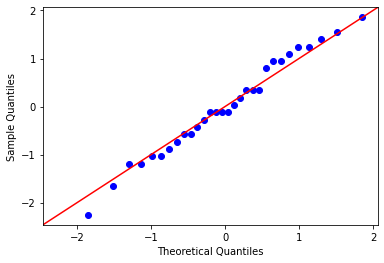

In [19]:
from statsmodels.api import qqplot
qqplot(df.value, fit=True, line='45');

Como observado os pontos estão bem próximos a linha vermelha o que indica normalidade dos dados.

Documentação QQ plot:

https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

https://docs.ufpr.br/~lucambio/CE224/1S2015/QQplot.pdf

#### **Campanha de Marketing** *

Um cientista de dados alocado dentro do departamento de MKT recebe a missão de entender se o formado dos anúncios e o nível de 
investimentos em diferentes campanhas influenciam a métrica de CTR (Click-Through Rate) do anúncio.

O cientista pediu ao time de MKT que criassem 40 campanhas com diferentes combinações de nível de investimento e formato do anúncio.

Depois de 7 dias, o cientista coletou os resultados do CTR médio de cada campanha. Os resultados são mostrados abaixo:

| Formato / Investimento |        |       |       |      |
|------------------------|--------|-------|-------|------|
|                        | Nenhum | Baixo | Médio | Alto |
| Vídeo                  | 4.8    | 5     | 6.4   | 6.3  |
| Vídeo                  | 4.4    | 5.2   | 6.2   | 6.4  |
| Vídeo                  | 3.2    | 5.6   | 4.7   | 5.6  |
| Vídeo                  | 3.9    | 4.3   | 5.5   | 4.8  |
| Vídeo                  | 4.4    | 4.8   | 5.8   | 5.8  |
| Imagem                 | 4.4    | 4.9   | 5.8   | 6    |
| Imagem                 | 4.2    | 5.3   | 6.2   | 4.9  |
| Imagem                 | 3.8    | 5.7   | 6.3   | 4.6  |
| Imagem                 | 3.7    | 5.4   | 6.5   | 5.6  |
| Imagem                 | 3.9    | 4.8   | 5.5   | 5.5  |

In [44]:
# H0: O CTR médio das campanhas é igual
# H1: O CTR médio das campanhas é diferente

formato = ['video' for i in range(20)]
formato += ['imagem' for i in range(20)]

nenhum = ['nenhum' for i in range(5)]
baixo = ['baixo' for i in range(5)]
medio = ['medio' for i in range(5)]
alto = ['alto' for i in range(5)]
investimento = nenhum + baixo + medio + alto
investimento += investimento

v1 = [4.8, 4.4, 3.2, 3.9, 4.4]
v2 = [5.0, 5.2, 5.6, 4.3, 4.8]
v3 = [6.4, 6.2, 4.7, 5.5, 5.8]
v4 = [6.3, 6.4, 5.6, 4.8, 5.8]
img1 = [4.4, 4.2, 3.8, 3.7, 3.9]
img2 = [4.9, 5.3, 5.7, 5.4, 4.8]
img3 = [5.8, 6.2, 6.3, 6.5, 5.5]
img4 = [6.0, 4.9, 4.6, 5.6, 5.5]
cps = v1 + v2 + v3 + v4 + img1 + img2 + img3 + img4

import pandas as pd
df = pd.DataFrame({'formato': formato, 'investimento': investimento, 'ctr': cps})

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Notação do R para criação do modelo
model = ols('ctr ~ C(formato) + C(investimento) + C(formato):C(investimento)', data=df).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(formato),0.00025,1.0,0.000921,9.759750e-01
C(investimento),18.76475,3.0,23.048979,3.898088e-08
C(formato):C(investimento),1.01075,3.0,1.241517,3.108977e-01
Residual,8.68400,32.0,NaN,NaN


A regressão foi necessária pois precisava ser analisada a relação das variáveis independentes com a dependente.

De acordo com o resultado somente investimento apresenta uma influência para o CTR.